In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append('../..') # add standard 's modules
sys.path.append(wd_path)
#########################################

In [2]:
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

In [4]:
mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False) 

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [8]:
runid	= 'Arc12'
data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'
tracername = 'w100m'

time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

w_sel = data.w100m.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
w_sel = w_sel.compute()

In [9]:
w_sel

<xarray.DataArray 'w100m' (time: 372, nod2d: 753179)>
array([[-2.897877e-05, -1.639769e-05, -2.243124e-06, ..., -1.481265e-05,
        -2.154451e-05, -2.364241e-05],
       [-3.499289e-05, -1.413281e-05,  4.078965e-07, ..., -3.926441e-05,
        -2.940500e-05, -2.146963e-05],
       [-1.772884e-05, -2.146174e-05,  7.141761e-07, ..., -2.138895e-05,
        -1.568063e-05, -1.287150e-05],
       ...,
       [-6.485765e-05, -2.579618e-05, -5.396036e-07, ...,  1.303127e-05,
         6.288301e-06, -3.682931e-05],
       [-1.134280e-04, -5.320974e-05,  2.786571e-06, ..., -3.423453e-05,
        -2.346563e-05, -7.909068e-05],
       [-6.843609e-05, -3.709727e-05, -1.334420e-06, ..., -4.379364e-05,
        -3.694044e-05, -5.495905e-05]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01 1985-02-01 ... 2015-12-01
Dimensions without coordinates: nod2d
Attributes:
    units:      m / s
    long_name:  w at 100m

In [ ]:
# runid	= 'Arc12'
# data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf/'
# tracername = 'tr0150m'

# time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
# data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
# data['time'] = time

# din_sel = data.tr0150m.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
# din_sel = din_sel.compute()
# din_sel, elem_no_nan2 = pf.get_data(din_sel,mesh,50)
# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

# din_sept = din_sel[data['time.month']==9]
# din_sept = din_sept.compute()
# din_sept_mean = din_sept.mean(dim='time')
# din_sept_mean = din_sept_mean.compute()

# pff = np.polyfit(years, din_sept, 1)
# din_trend = pff[0]

In [10]:
print('loading index...')
df = pd.read_csv(meshpath+'bioregion_index_latlon.csv', delimiter=',',header=0)
print('LOADING DONE')
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
print('SORTING...')
names = df.Name.unique().tolist()
names.pop(-1)
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66N)')
print('CLEANING DONE...')

loading index...
LOADING DONE
SORTING...
CLEANING DONE...


In [11]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [12]:
#ind_bio = df.full_index[df.Unique_ID == 47]  #np.array(mesh.x2>-100) & np.array(mesh.x2<50))
ind1 = (np.array(mesh.topo > 300) & np.array(mesh.topo < 800))
ind2 = ~(np.array(mesh.y2 < 75) & np.array(np.abs(mesh.x2) < 80))
ind3 = ~(np.array(mesh.y2 < 66) & np.array(np.abs(mesh.x2) >= 80))
ind4 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 < -20) & np.array(mesh.x2 > -100))
ind5 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 > -20) & np.array(mesh.x2 < 0))
ind6 = ~(np.array(mesh.y2 < 80) & np.array(mesh.x2 > 20) & np.array(mesh.x2 < 60))
ind7 = ~(np.array(mesh.x2 < 0))
ind_bio=ind1&ind2&ind3&ind4&ind5&ind6&ind7

# ind_bio= (np.array(mesh.x2>-100) & np.array(mesh.x2<50)) | np.array(mesh.y2>65)
#len(mesh.topo)

In [13]:
# data_din = np.sum(din_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])

In [14]:
data_w = np.sum(w_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])

In [15]:
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))

In [16]:
# plt.plot(dates,data_w)
data_w = data_w *3600*24*30

In [17]:
df2 = pd.DataFrame()
df2['time'] = dates
df2.set_index('time', inplace= True)
df2['w'] = data_w
#df2['din'] = data_din

In [18]:
df2_yrmean = df2.resample('YS').median()
df2_mar = df2[df2.index.month == 3]
df2_sept = df2[df2.index.month == 9]

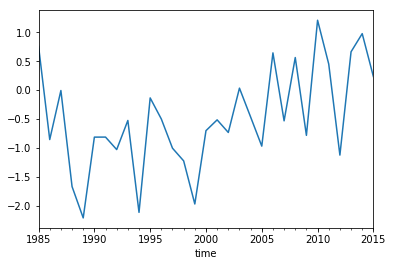

In [19]:
df2_mar['w'].plot()
# df2_sept['w'].plot()
# df2_yrmean['w'].plot()
# 0-50 cm/day Lind and Ingvaldsen - 22 cm/day

In [20]:
from utils import linregsum
y = df2_mar['w']
print np.nanmean(y)
smry = linregsum(years, y)

-0.4889882
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     8.113
Date:                Thu, 11 Feb 2021   Prob (F-statistic):            0.00800
Time:                        19:31:02   Log-Likelihood:                -36.062
No. Observations:                  31   AIC:                             76.12
Df Residuals:                      29   BIC:                             78.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.0768     32.156     -2.8

In [ ]:
# plt.plot(df2_mar['din'])
# plt.plot(df2_mar['w']*df2_mar['din'])

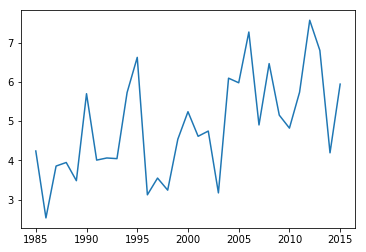

In [21]:
tracername = 'ANPP'
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = dates
data_sel = data[tracername].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1).data *12 / 10**15
plt.plot(years,data_reg)

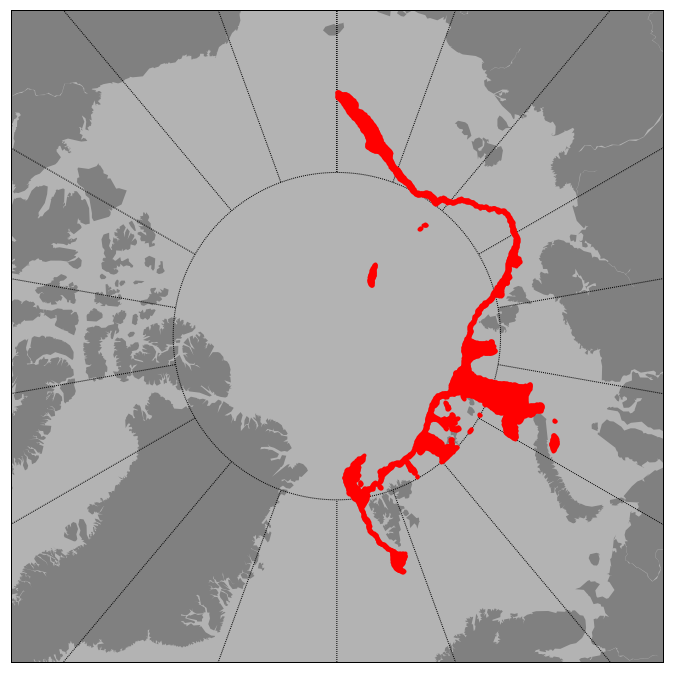

In [22]:
import pyfesom as pf
fig = plt.figure(figsize=(12, 12), facecolor='w', edgecolor='k')
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')

plt.plot(x[ind_bio], y[ind_bio], '.r')

In [23]:
w_mar = w_sel[w_sel['time.month']==3]
w_mar = w_mar.compute()
w_sept = w_sel[w_sel['time.month']==9]
w_sept = w_sept.compute()
w_sept_mean = w_sept.mean(dim='time')
w_sept_mean = w_sept_mean.compute()

#w_sept.fillna(0)
# w_sept.replace([np.inf, -np.inf], np.nan)
#w_sept[w_sept == np.inf] = 0.
pff = np.polyfit(years, w_sept, 1)
w_trend = pff[0]

For depth 0 model level -0.0 will be used


Text(0.5,1,'S')

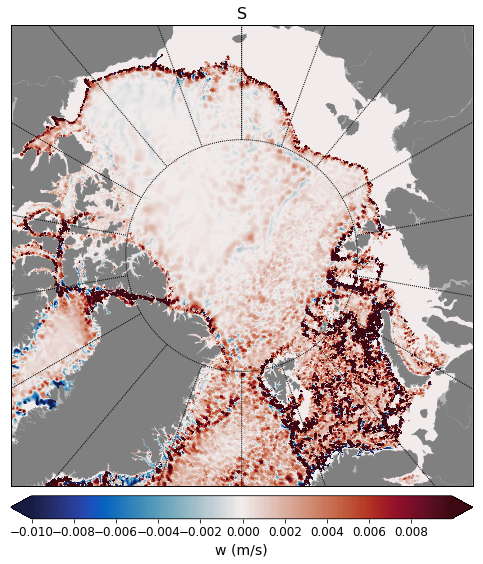

In [24]:
import pyfesom as pf
fig = plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')

w_sept_mean[w_sept_mean == 0] = np.nan
data, elem_no_nan = pf.get_data(w_sept_mean*1000,mesh,0)
ax1      = fig.add_subplot(221)
contours = np.arange(-0.01, 0.01, .0001)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'w (m/s)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('S', fontsize=16)

For depth 0 model level -0.0 will be used


Text(0.5,1,'S')

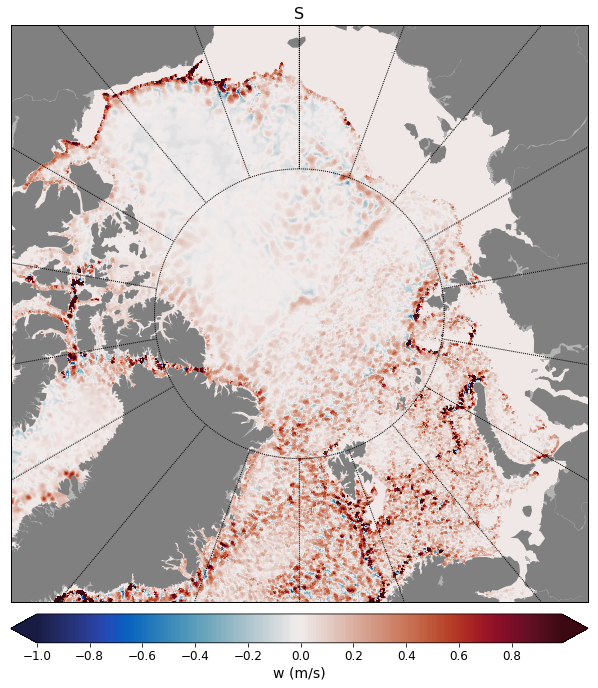

In [25]:
fig = plt.figure(figsize=(25, 25), facecolor='w', edgecolor='k')

w_trend[w_trend == 0] = np.nan
data, elem_no_nan = pf.get_data(w_trend*1000000,mesh,0)
ax1      = fig.add_subplot(221)
contours = np.arange(-1, 1, .01)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'w (m/s)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('S', fontsize=16)